In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np                             #MATHEMATICAL CALCULATIONS
import pandas as pd                            #Manipulating data
import matplotlib.pyplot as plt                #
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/Lemalabs/Data/'

In [ ]:
raw_data =pd.read_csv(path + 'Chennai_house_univariate.csv')

In [ ]:
raw_data.tail(5)

,Size,Price
92,570.77,930000
93,552.04,860000
94,513.01,700000
95,747.64,1580000
96,2034.10,7710000


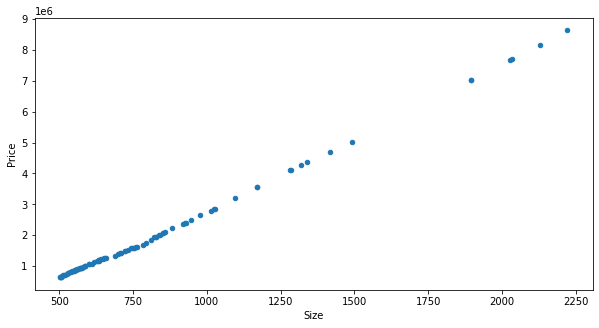

In [ ]:
raw_data.plot(kind= 'scatter', x = 'Size', y= 'Price', figsize = (10,5))

In [ ]:
data= ((raw_data-raw_data.mean()) /(raw_data.max()-raw_data.min()))
data.head()

,Size,Price
0,-0.054820,-0.063773
1,-0.158528,-0.144922
2,0.020808,0.008636
3,0.066977,0.052331
4,-0.153242,-0.141177


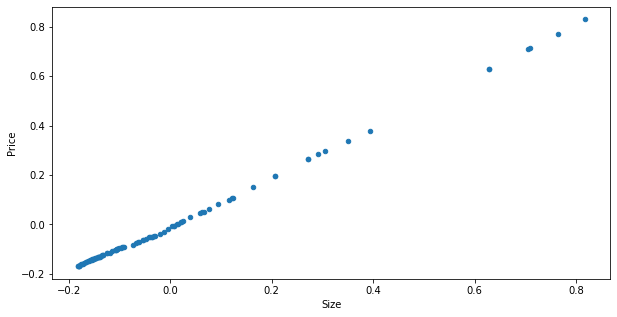

In [ ]:
data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize=(10,5))

In [ ]:
data.shape

(97, 2)

In [ ]:
data.insert(0,'ones',1)
data.head()

,ones,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


In [ ]:
cols = data.shape[1]
cols

3

In [ ]:
x = data.iloc[: , 0:cols-1]
y = data.iloc[: , cols-1:cols]

In [ ]:
x

,ones,Size
0,1,-0.054820
1,1,-0.158528
2,1,0.020808
3,1,0.066977
4,1,-0.153242
...,...,...
92,1,-0.142762
93,1,-0.153667
94,1,-0.176390
95,1,-0.039788


In [ ]:
y

,Price
0,-0.063773
1,-0.144922
2,0.008636
3,0.052331
4,-0.141177
...,...
92,-0.132438
93,-0.141177
94,-0.161152
95,-0.051289


In [ ]:
x = np.matrix(x)

In [ ]:
y = np.matrix(y)

In [ ]:
theta = np.matrix([0,0])

In [ ]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [ ]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [ ]:
computeError(x,y,theta)

0.024346853685025285

In [ ]:
x.shape,y.shape

((97, 2), (97, 1))

In [ ]:
learning_rate = 1
iters = 150
def gradientDescent(x,y,theta,learning_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = theta.shape[1]
  cost = [] #list to track cost

  for i in range(iters):
    error = (x*theta.T)-y
    for j in range(parameters):
      term = np.multiply(error, x[:,j])
      temp[0,j] = theta[0,j] - ((learning_rate/len(x))*np.sum(term))
    
    theta = temp
    cost_iter = computeError(x,y,theta)
    cost.append(cost_iter)
  return theta, cost

In [ ]:
new_theta,cost = gradientDescent(x,y,theta,learning_rate,iters)

In [ ]:
print(new_theta)

[[2.73120587e-16 9.82955251e-01]]


In [ ]:
print(cost)

[0.0219673183380595, 0.019820870807582117, 0.017884678934253863, 0.016138147087044627, 0.014562697083697286, 0.01314157057116722, 0.011859650763921774, 0.01070330164389687, 0.009660222911651065, 0.008719319145805603, 0.007870581778995266, 0.0071049826348863416, 0.006414377893795337, 0.005791421465372894, 0.005229486846882187, 0.0047225966358638285, 0.004265358947400457, 0.0038529100596397235, 0.0034808626774854535, 0.0031452592641283447, 0.002842529943995028, 0.0025694545293213898, 0.002323128266419802, 0.0021009309372769366, 0.0019004989878101933, 0.0017197003863058098, 0.0015566119446032342, 0.0014094988607869883, 0.001276796265777864, 0.0011570925775311307, 0.0010491144857772655, 0.0009517134075851379, 0.0008638532696729556, 0.0007845994875051558, 0.0007131090239438623, 0.0006486214217069421, 0.0005904507142432565, 0.0005379781289795985, 0.0004906455053223957, 0.00044794935740025273, 0.0004094355183916245, 0.0003746943094683421, 0.0003433561819661532, 0.0003150877864272378, 0.000289

In [ ]:
computeError(x,y,new_theta)

5.4775860762987386e-05

***PLOT Between model price and actual price***

In [ ]:
model_price= x*new_theta.T

Text(0.5, 1.0, 'Predicted price vs Actual price')

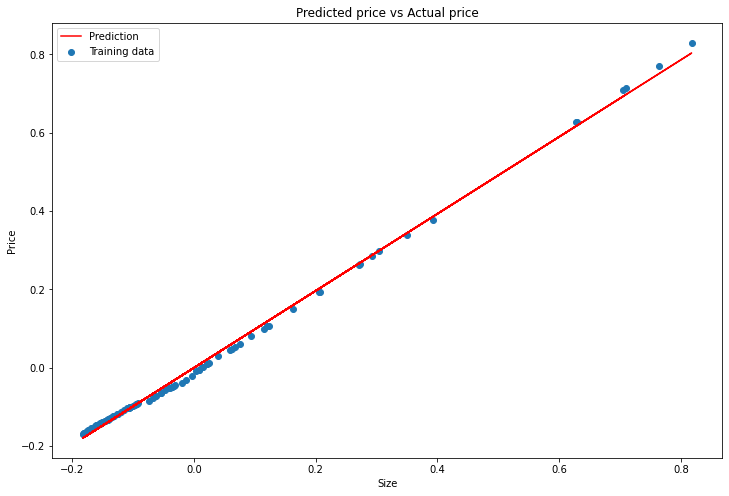

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(data.Size,model_price,'r',label= 'Prediction')
ax.scatter(data.Size,data.Price,label= 'Training data')
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted price vs Actual price')

Text(0.5, 1.0, 'Error Vs Iterations')

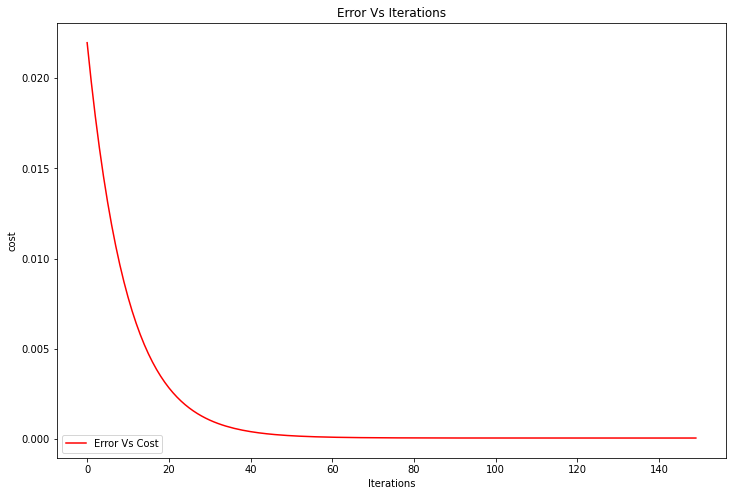

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r',label= 'Error Vs Cost')
ax.legend(loc=3)
ax.set_xlabel('Iterations')
ax.set_ylabel('cost')
ax.set_title('Error Vs Iterations')

***Error and Accuracy calculations***

In [ ]:
from sklearn.metrics import mean_absolute_error

Error = mean_absolute_error(model_price,y)
Accuracy = 1-Error

print('Error = {} %'.format(round(Error*100,2)))
print('Accuracy = {} %'.format(round(Accuracy*100,2)))

Error = 0.94 %
Accuracy = 99.06 %


***Prediction***


In [ ]:
def predict(new_theta,accuracy):
#get input from the user
  size= float(input("Enter the size of the House in sqft.:"))
#Mean Normalisation
  size= (size - raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
#Model
  price = (new_theta[0,0] + (new_theta[0,1]*size))
#Reverse Mean Normalisation
  Predicted_Price = (price* (raw_data.Price.max()-raw_data.Price.min())) + (raw_data.Price.mean())

  Price_at_max_accuracy = (Predicted_Price*(1/accuracy))
  Price_range = Price_at_max_accuracy - Predicted_Price
  return Predicted_Price, Price_range

In [ ]:
Predicted_price, Price_range = predict(new_theta,Accuracy)
print("Your house cost is",str(round(Predicted_price)),'(+ or -)',str(Price_range))

Enter the size of the House in sqft.:1200
Your house cost is 3751161.0 (+ or -) 35691.47797277197
